In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from dython.nominal import associations
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm
from sklearn.tree import DecisionTreeRegressor
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('Data.csv')
print(3)

import warnings
warnings.filterwarnings('ignore')

3


In [2]:
#fig = plt.pyplot.gfc()
#plt.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)

In [3]:
data.head()

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,A_1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000
1,A_2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000
2,A_3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000
3,A_4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000
4,A_5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900


In [4]:


# Make column labels lowercase
data.columns = map(str.lower, data.columns)
# Replace spaces in columns with underscore
data.columns = data.columns.str.replace('\s+', '_')


In [5]:
data.head()

,unnamed:_0,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,three_season_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,year_sold,sale_type,sale_condition,sale_price
0,A_1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000
1,A_2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000
2,A_3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000
3,A_4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000
4,A_5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900


In [6]:
data.drop(['unnamed:_0'], axis = 1, inplace= True)
data.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,three_season_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,year_sold,sale_type,sale_condition,sale_price
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900


In [7]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['lot_frontage', 'lot_area', 'year_built', 'year_remod_add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'first_flr_sf', 'second_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'three_season_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'year_sold', 'sale_price']


In [8]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax =fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[var_name].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
        fig.tight_layout()
 #plt.savefig('../assets/png/histograms.png')
        plt.show()

In [9]:
#pip install dython

In [10]:
#conda install -c conda-forge dython

In [11]:
#pip install git+https://github.com/shakedzy/dython.git


In [12]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(data)
categorical_features
len(categorical_features)

46

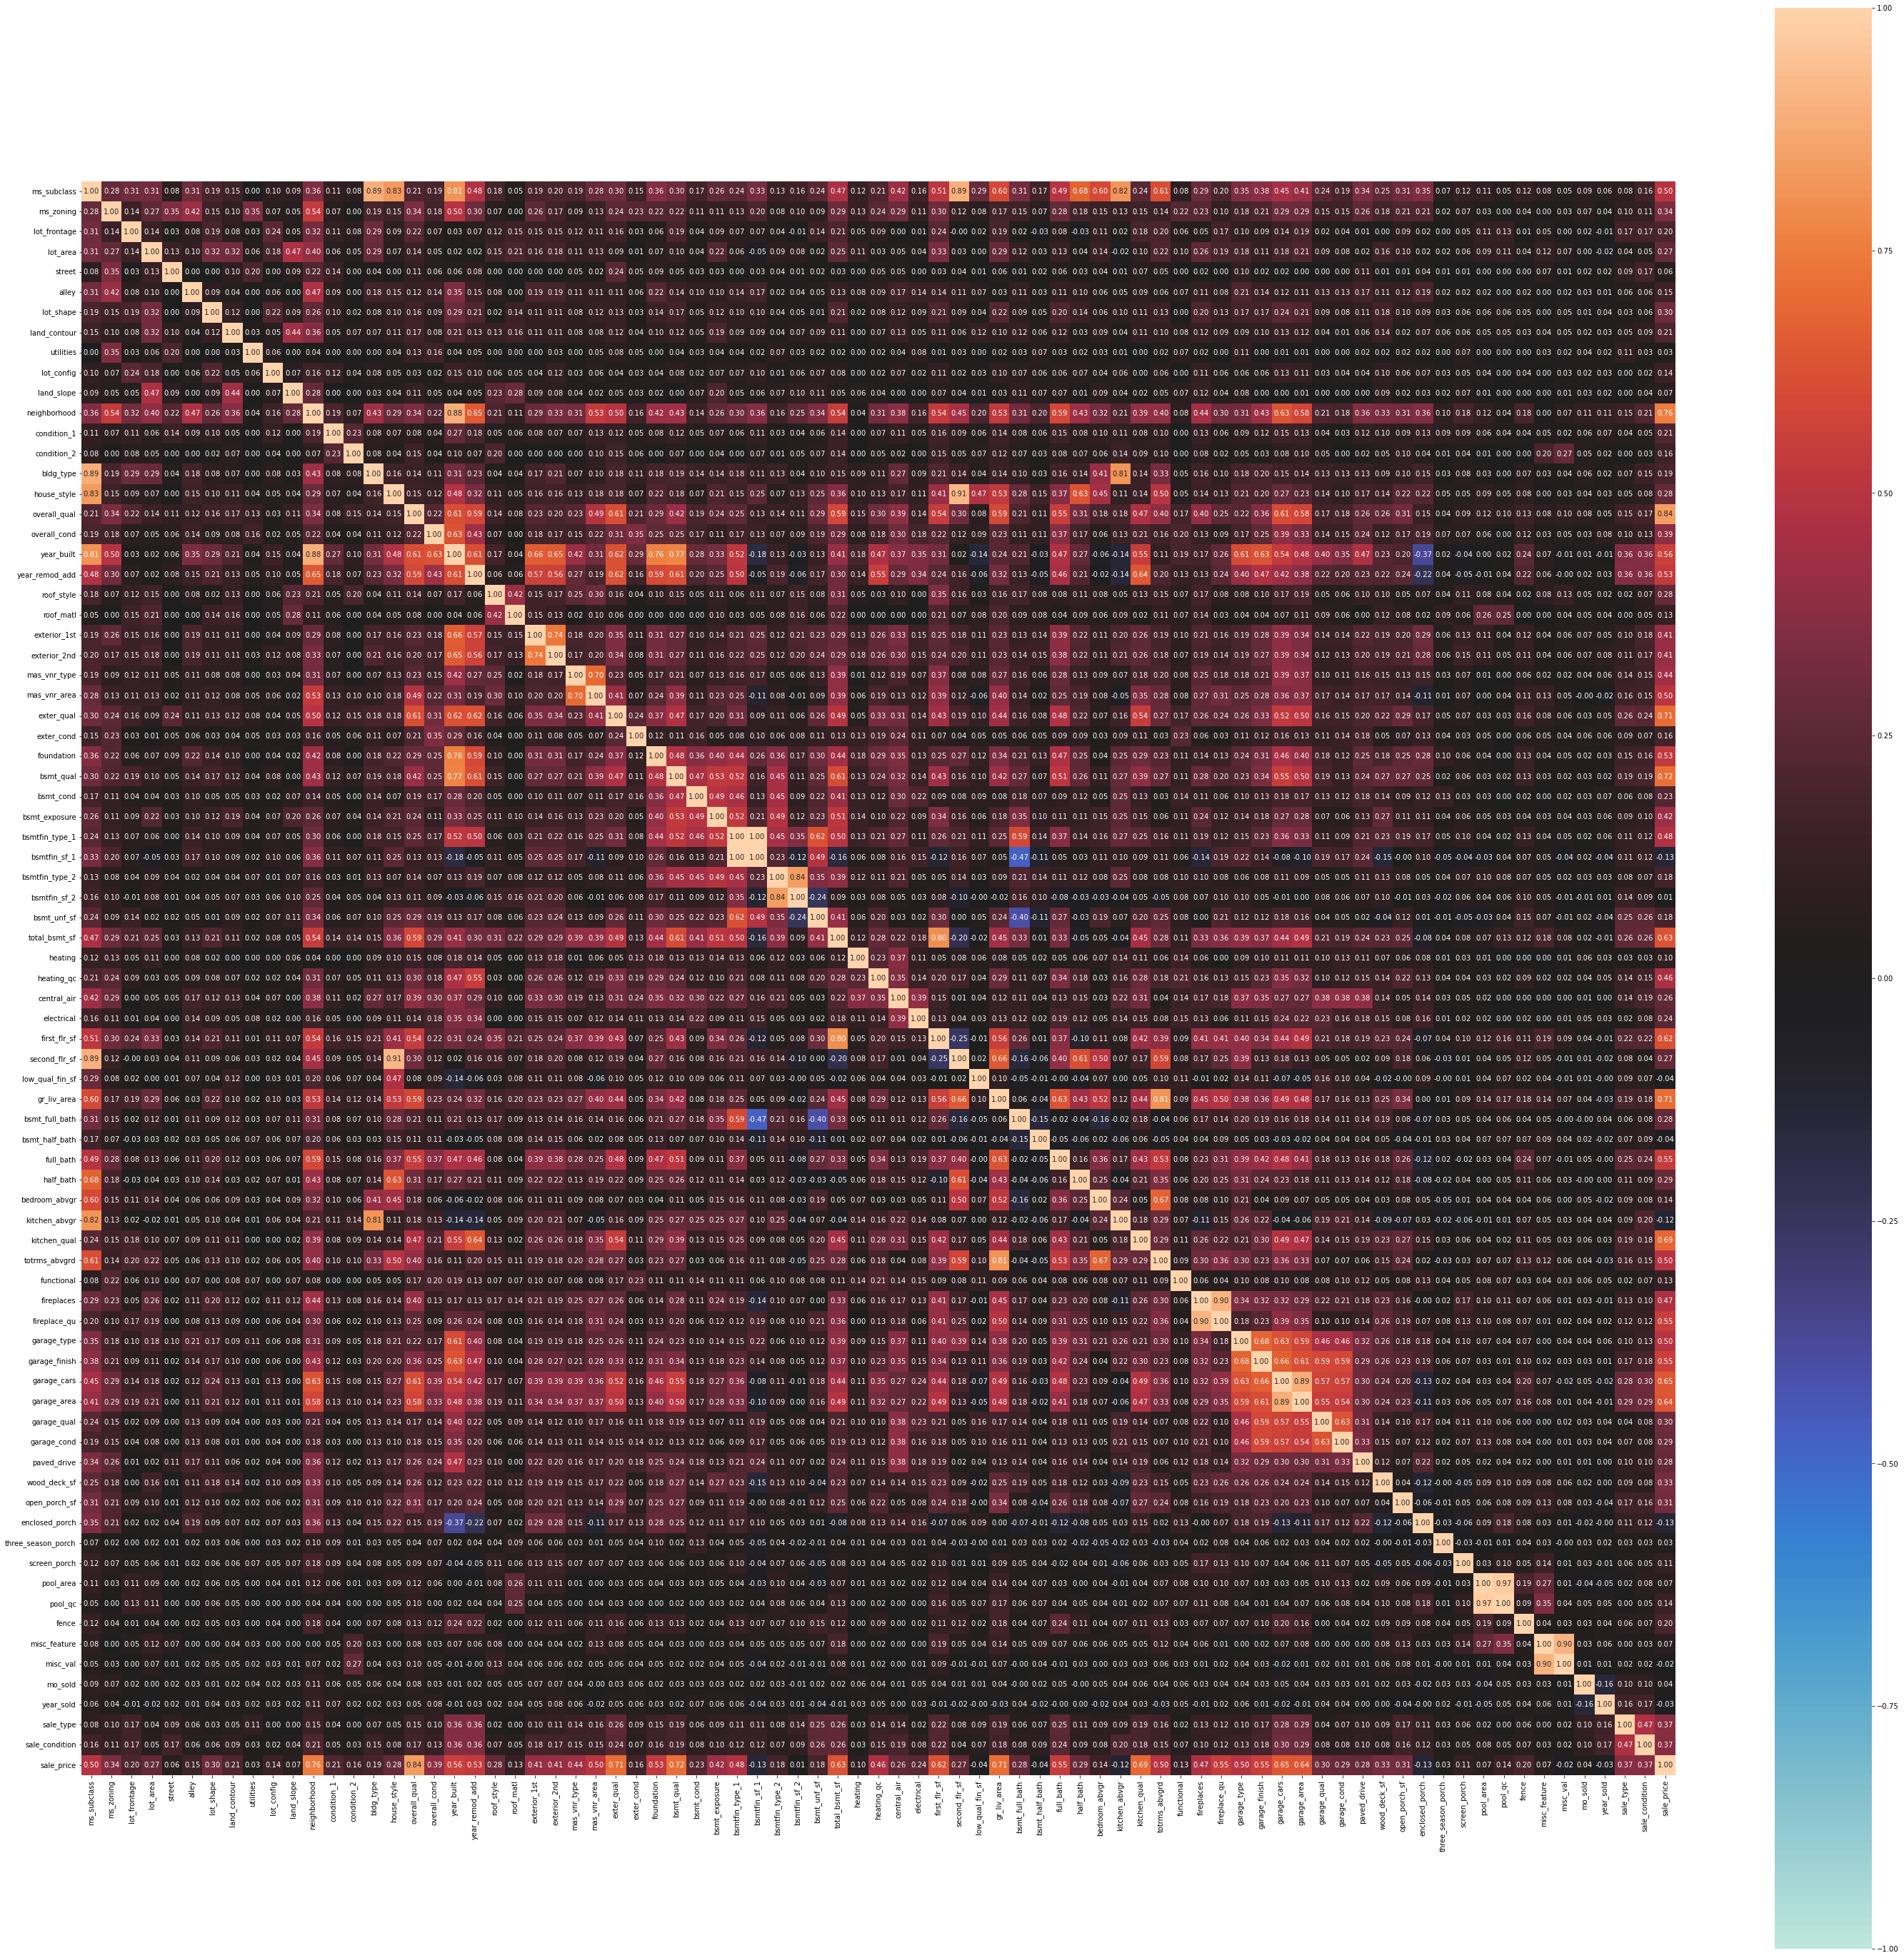

In [13]:
complete_correlation = associations(data, filename= 'complete_correlation2.png', figsize=(50,50))

In [14]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [15]:
new_data = data[['ms_subclass',
'neighborhood',
'overall_qual',
'year_built',
'year_remod_add',
'mas_vnr_area',
'exter_qual',
'foundation',
'bsmt_qual',
'total_bsmt_sf',
'first_flr_sf',
'gr_liv_area',
'full_bath',
'kitchen_qual',
'totrms_abvgrd',
'fireplace_qu',
'garage_type',
'garage_finish',
'garage_cars',
'garage_area',
'sale_price']].copy()



new_df = old_df[['col1','col2']].copy()


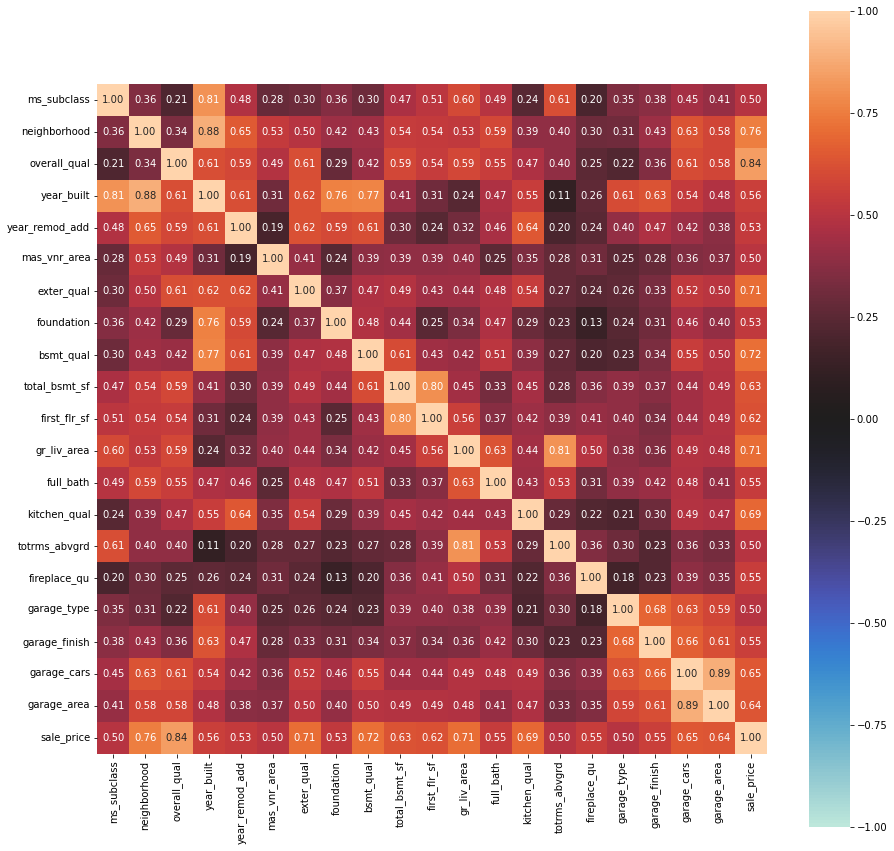

{'corr':                 ms_subclass  neighborhood  overall_qual  year_built  \
 ms_subclass        1.000000      0.359017      0.212717    0.810595   
 neighborhood       0.359017      1.000000      0.338143    0.883841   
 overall_qual       0.212717      0.338143      1.000000    0.613865   
 year_built         0.810595      0.883841      0.613865    1.000000   
 year_remod_add     0.479470      0.652480      0.586030    0.612095   
 mas_vnr_area       0.284058      0.533004      0.490795    0.306797   
 exter_qual         0.303565      0.497226      0.613546    0.624208   
 foundation         0.363383      0.423850      0.287593    0.758160   
 bsmt_qual          0.303775      0.431641      0.418511    0.767819   
 total_bsmt_sf      0.467268      0.539512      0.588679    0.407764   
 first_flr_sf       0.509445      0.538767      0.541087    0.310463   
 gr_liv_area        0.596075      0.530714      0.586631    0.241726   
 full_bath          0.493653      0.590206      0.551994

In [16]:
associations(new_data, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',ax=None, figsize=(15,15), annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

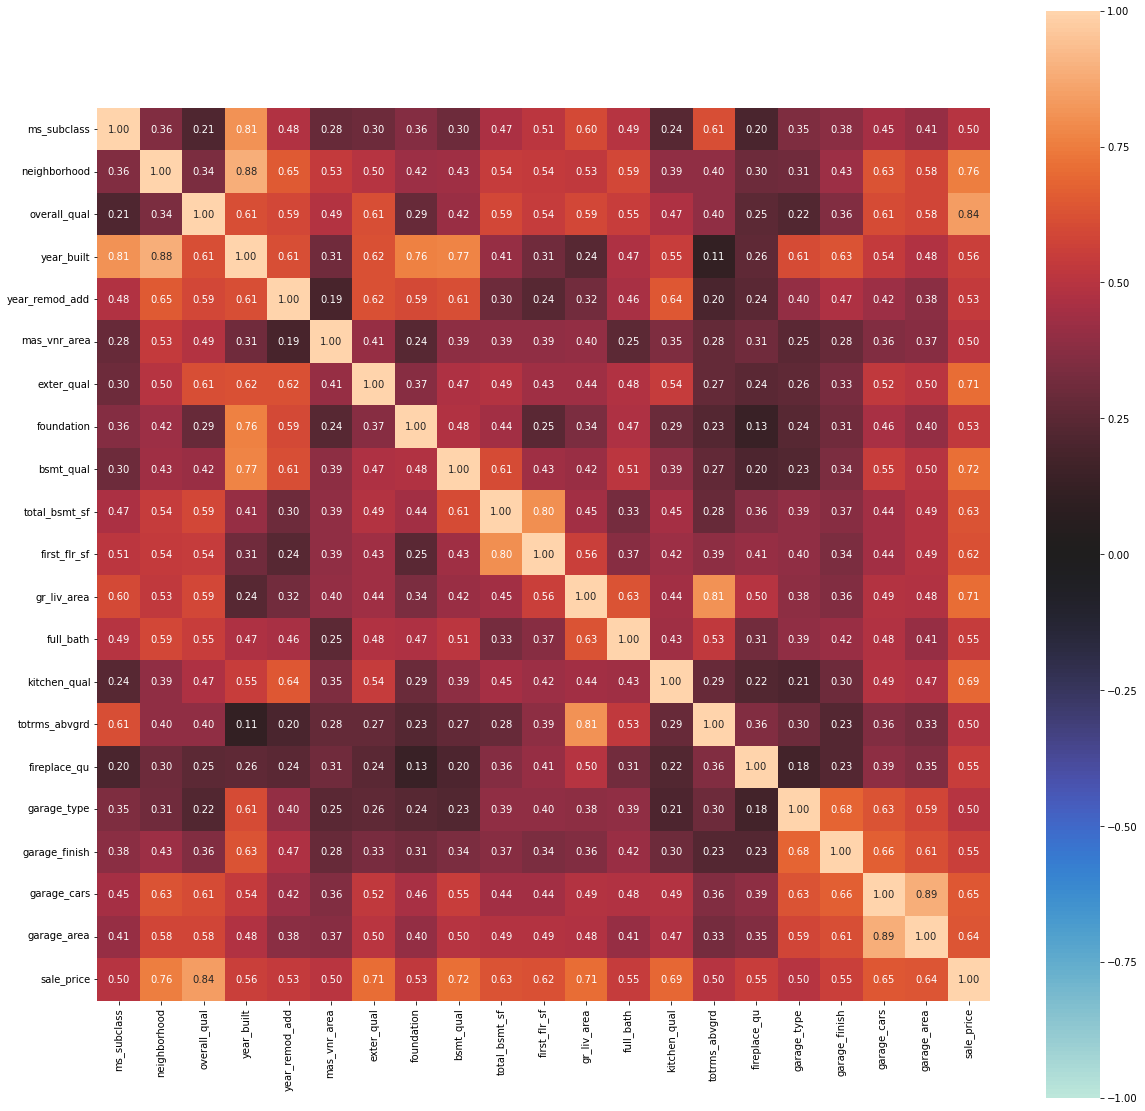

In [17]:
complete_correlation= associations(new_data, figsize=(20,20))

In [18]:
new_data.columns

Index(['ms_subclass', 'neighborhood', 'overall_qual', 'year_built',
       'year_remod_add', 'mas_vnr_area', 'exter_qual', 'foundation',
       'bsmt_qual', 'total_bsmt_sf', 'first_flr_sf', 'gr_liv_area',
       'full_bath', 'kitchen_qual', 'totrms_abvgrd', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'sale_price'],
      dtype='object')

In [19]:
new_data.describe()

,year_built,year_remod_add,mas_vnr_area,total_bsmt_sf,first_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_cars,garage_area,sale_price
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1984.266553,101.096928,1051.255631,1159.557679,1499.690444,1.566553,6.443003,1.766212,472.658362,180796.060068
std,30.245361,20.860286,178.634545,440.968018,391.890885,505.508887,0.552941,1.572964,0.761137,215.187196,79886.692357
min,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1965.000000,0.000000,793.000000,876.250000,1126.000000,1.000000,5.000000,1.000000,320.000000,129500.000000
50%,1973.000000,1993.000000,0.000000,990.000000,1084.000000,1442.000000,2.000000,6.000000,2.000000,480.000000,160000.000000
75%,2001.000000,2004.000000,162.750000,1301.500000,1384.000000,1742.750000,2.000000,7.000000,2.000000,576.000000,213500.000000
max,2010.000000,2010.000000,1600.000000,6110.000000,5095.000000,5642.000000,4.000000,15.000000,5.000000,1488.000000,755000.000000


In [20]:
new_data.dtypes

ms_subclass       object
neighborhood      object
overall_qual      object
year_built         int64
year_remod_add     int64
mas_vnr_area       int64
exter_qual        object
foundation        object
bsmt_qual         object
total_bsmt_sf      int64
first_flr_sf       int64
gr_liv_area        int64
full_bath          int64
kitchen_qual      object
totrms_abvgrd      int64
fireplace_qu      object
garage_type       object
garage_finish     object
garage_cars        int64
garage_area        int64
sale_price         int64
dtype: object

### EXPLORATORY DATA ANALYSIS

#### Looking at the categorical variable **"MS SUBCLASS"** with respect to Sales Price

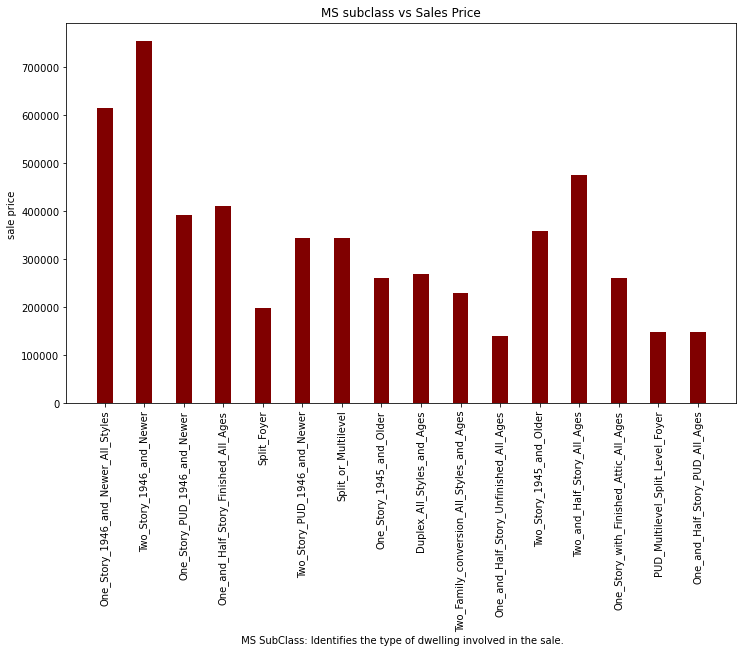

In [21]:
plt.figure(figsize = (12,7))
plt.bar(new_data['ms_subclass'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel(" MS SubClass: Identifies the type of dwelling involved in the sale.")
plt.ylabel("sale price ")
plt.title("MS subclass vs Sales Price")
plt.xticks(rotation = 90)
plt.show()

##### Looking at the categorical variable **"Neighborhood"** with respect to Sales Price

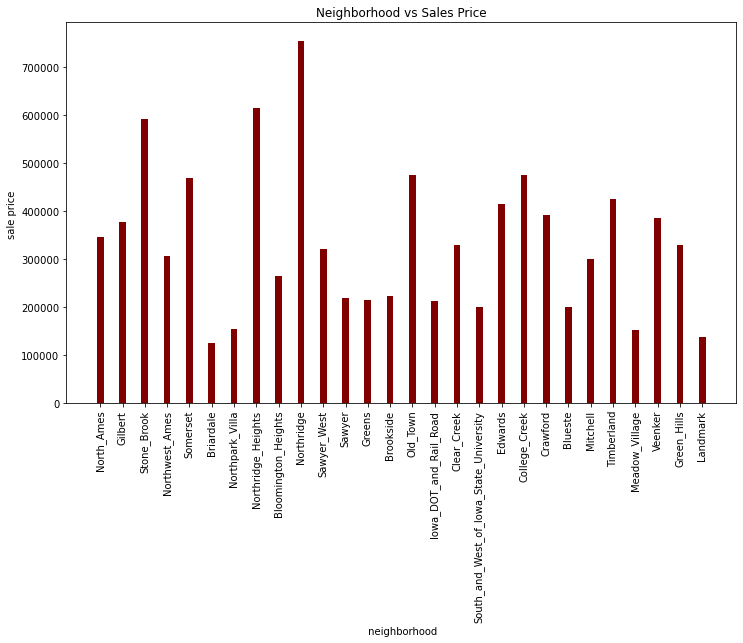

In [22]:
plt.figure(figsize = (12,7))
plt.bar(new_data['neighborhood'], new_data['sale_price'], color ='maroon', 
        width = 0.3)
 
plt.xlabel(" neighborhood")
plt.ylabel("sale price ")
plt.title("Neighborhood vs Sales Price")
plt.xticks(rotation = 90)
plt.show()

#### Looking at the categorical variable **"Neighborhood"** with respect to Sales Price

Text(0.5, 1.0, 'Neighborhood vs Sales Price')

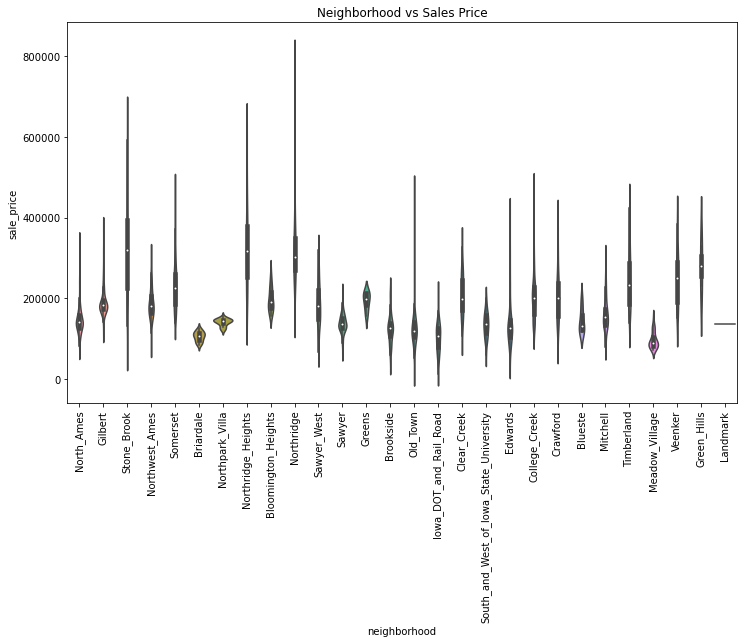

In [23]:
plt.figure(figsize = (12,7))


sns.violinplot(x = new_data['neighborhood'], y = new_data['sale_price'], data = new_data)
plt.xticks(rotation = 90)

plt.title("Neighborhood vs Sales Price")

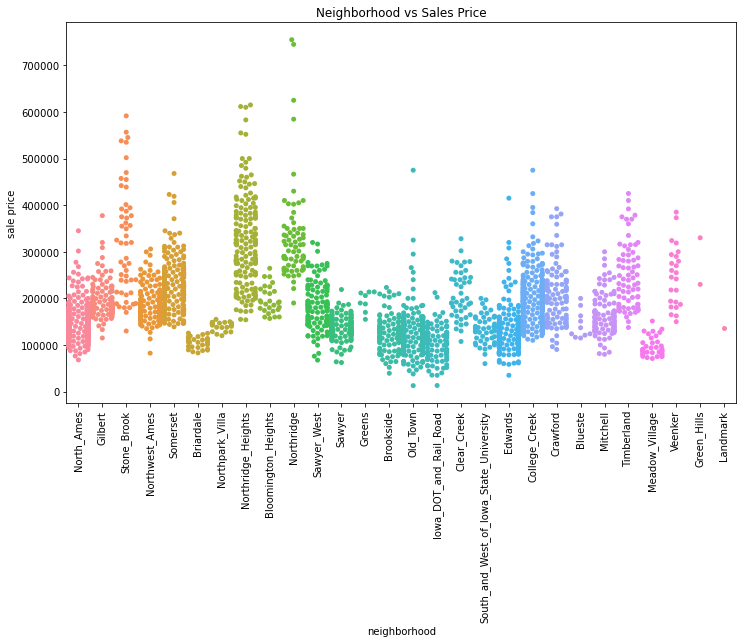

In [24]:
# Swarm plot
plt.figure(figsize = (12,7))
sns.swarmplot(x = new_data['neighborhood'], y = new_data['sale_price'], data=new_data)
plt.xlabel("neighborhood")
plt.ylabel("sale price")
plt.title("Neighborhood vs Sales Price")
plt.xticks(rotation = 90)
plt.show()




###### above  three plots show Neighborhood vs Sales Price

#### Looking at the categorical variable **"Overall Quality"** with respect to Sales Price

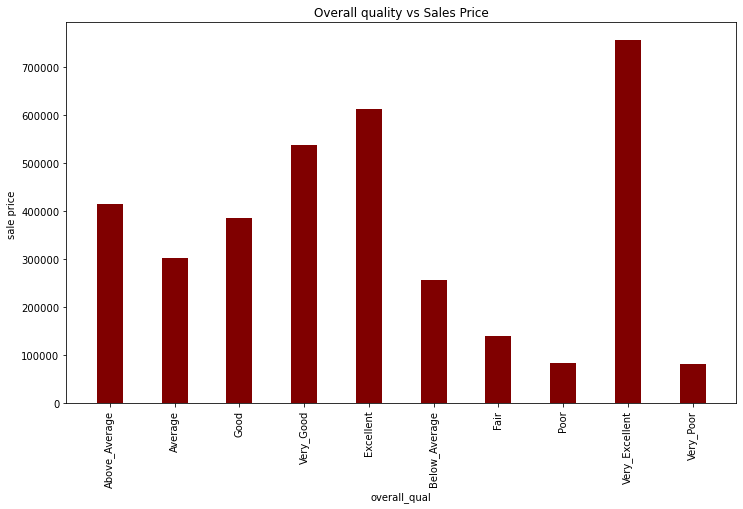

In [25]:
plt.figure(figsize = (12,7))
plt.title("Overall quality vs Sales Price")
plt.bar(new_data['overall_qual'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("overall_qual")
plt.ylabel("sale price ")

plt.xticks(rotation = 90)
plt.show()

#### Looking at the categorical variable **"External quality"** with respect to Sales Price

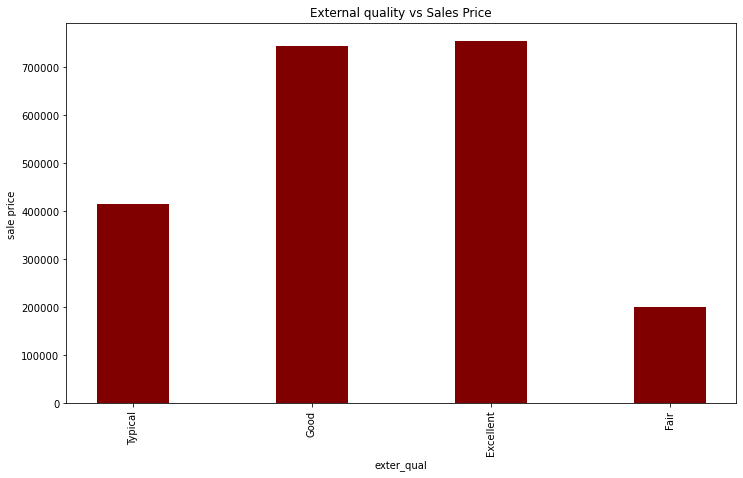

In [26]:
plt.figure(figsize = (12,7))
plt.title("External quality vs Sales Price")

plt.bar(new_data['exter_qual'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("exter_qual")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
plt.show()

#### Looking at the categorical variable **"Foundation"** with respect to Sales Price

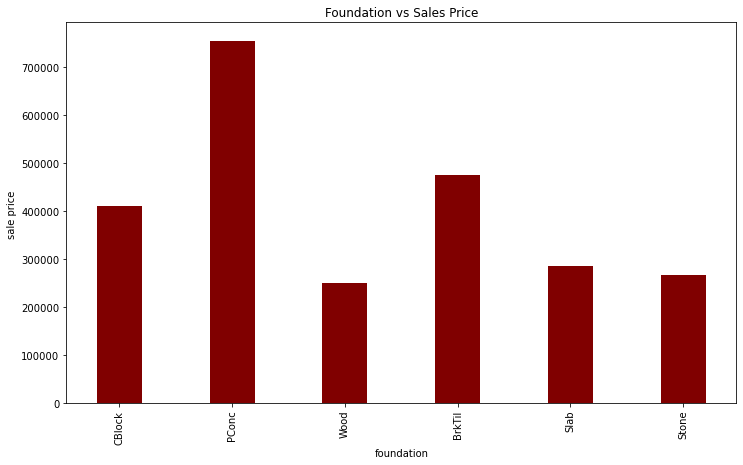

In [27]:
plt.figure(figsize = (12,7))
plt.title("Foundation vs Sales Price")

plt.bar(new_data['foundation'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("foundation")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
plt.show()

#### Looking at the categorical variable **"Basement Quality"** with respect to Sales Price

<function matplotlib.pyplot.show(close=None, block=None)>

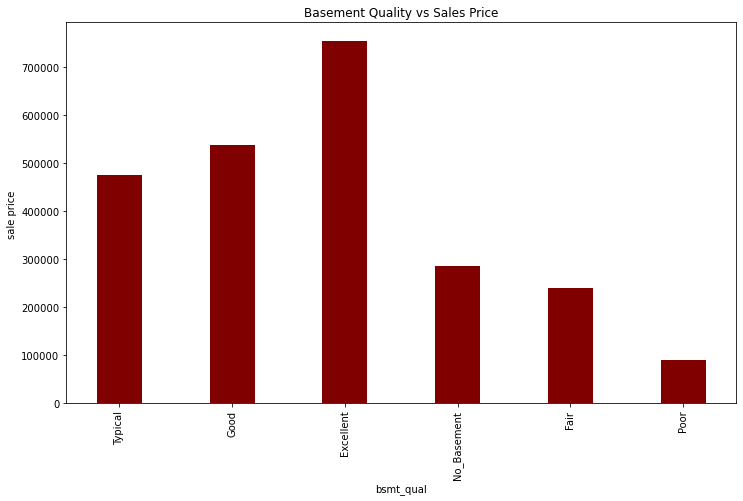

In [28]:

plt.figure(figsize = (12,7))
plt.title("Basement Quality vs Sales Price")

plt.bar(new_data['bsmt_qual'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("bsmt_qual")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
plt.show

#### Looking at the categorical variable **"Kitchen Quality"** with respect to Sales Price
​

<function matplotlib.pyplot.show(close=None, block=None)>

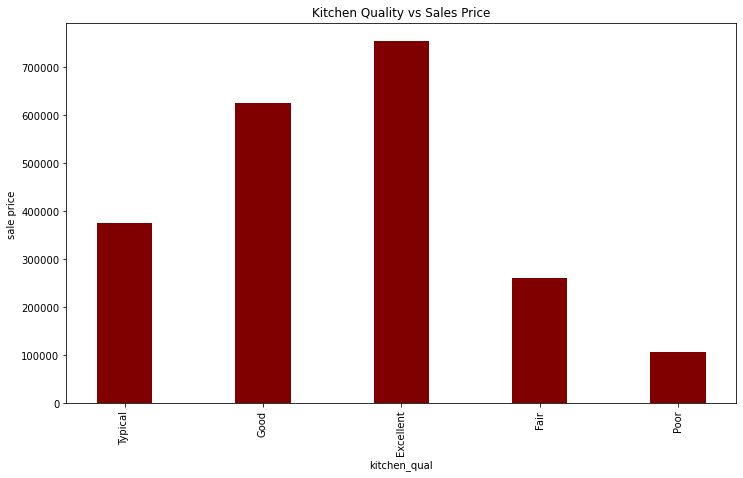

In [29]:

plt.figure(figsize = (12,7))
plt.title("Kitchen Quality vs Sales Price")

plt.bar(new_data['kitchen_qual'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("kitchen_qual")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
plt.show

#### Looking at the categorical variable **"Fireplace  Quality"** with respect to Sales Price

<function matplotlib.pyplot.show(close=None, block=None)>

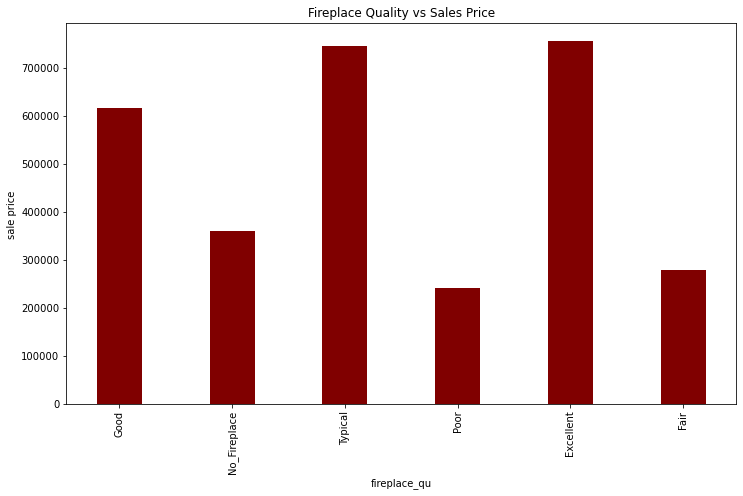

In [30]:
plt.figure(figsize = (12,7))
plt.title("Fireplace Quality vs Sales Price")

plt.bar(new_data['fireplace_qu'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("fireplace_qu")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
plt.show

#### Looking at the categorical variable **"Garage Type"** with respect to Sales Price


<function matplotlib.pyplot.show(close=None, block=None)>

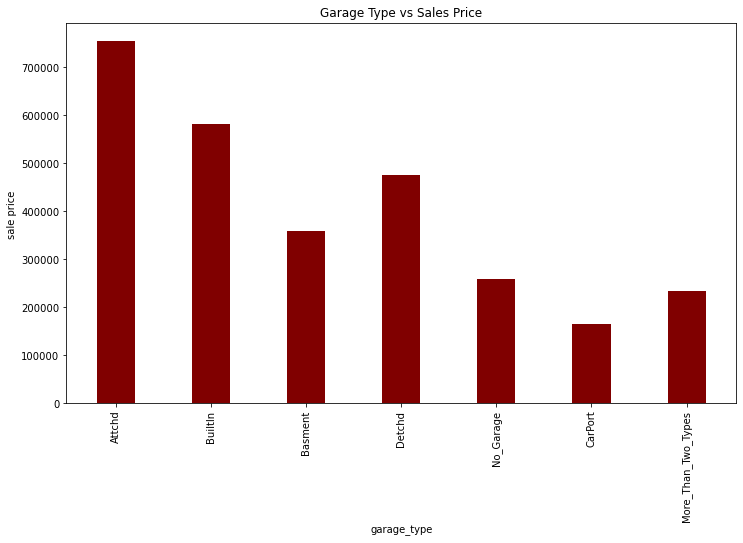

In [31]:
plt.figure(figsize = (12,7))
plt.bar(new_data['garage_type'], new_data['sale_price'], color ='maroon', 
        width = 0.4)
plt.title("Garage Type vs Sales Price") 
plt.xlabel("garage_type")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
plt.show

#### Looking at the categorical variable **"Garage Type"** with respect to Sales Price


#### Looking at the categorical variable "Year Built" with respect to Sales Price

<function matplotlib.pyplot.show(close=None, block=None)>

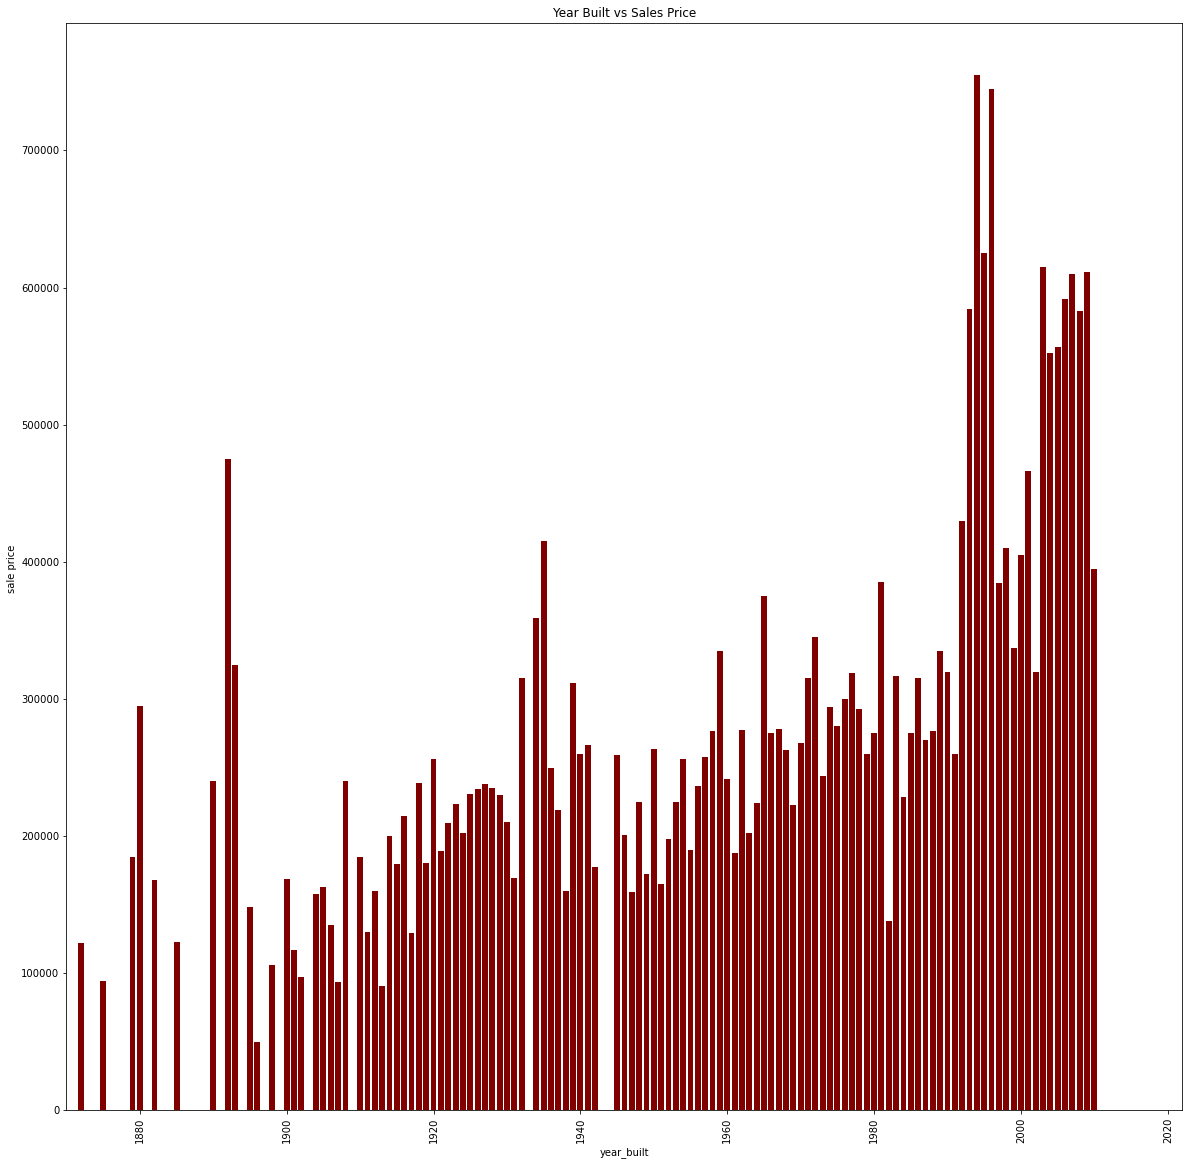

In [32]:
plt.figure(figsize=(20, 20))
plt.title("Year Built vs Sales Price") 
plt.xlim(1870,2022)
plt.bar(new_data['year_built'], new_data['sale_price'], color ='maroon')#,figsize=(20,20))
 
plt.xlabel("year_built")
plt.ylabel("sale price ")
plt.xticks(rotation = 90)
#plt.figure(figsize=(50, 10))
#plt.rcParams['figure.figsize'] = [20, 10]
#display(plt.plot(x, y))
plt.show

#### Looking at mas_vnr_area vs Sale Prace scatter plot

<AxesSubplot:xlabel='mas_vnr_area', ylabel='sale_price'>

<Figure size 1440x1440 with 0 Axes>

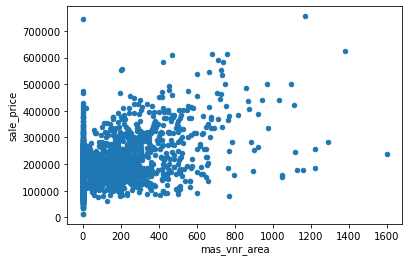

In [33]:

plt.figure(figsize=(20, 20))
new_data.plot.scatter(x ='mas_vnr_area', y = 'sale_price')



Higher the mas_vnr_area higher the sale price, we can see positive trend here

**Using IQR method to remove outliers**

In [34]:
#IQR to find lower and upper bound


Q1 = np.percentile(new_data['mas_vnr_area'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(new_data['mas_vnr_area'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", new_data.shape)
 
# Upper bound
upper = np.where(new_data['mas_vnr_area'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(new_data['mas_vnr_area'] <= (Q1-1.5*IQR))

print(upper[0])
print(lower[0])
 
''' Removing the Outliers '''
new_data.drop(upper[0], inplace = True)
new_data.drop(lower[0], inplace = True)
 
print("New Shape: ", new_data.shape)

Old Shape:  (2930, 21)
[  15   20   29   30   38   41   44   46   48   65   91   99  101  118
  139  147  169  264  267  294  342  366  367  402  405  406  421  422
  425  429  431  432  433  445  447  448  456  457  459  494  495  497
  498  499  500  504  570  571  573  574  580  597  627  640  641  666
  687  737  873  887  931  955  967  972 1022 1023 1030 1041 1044 1050
 1052 1055 1056 1057 1059 1063 1064 1066 1067 1069 1070 1072 1073 1074
 1093 1098 1099 1102 1104 1105 1106 1108 1109 1115 1124 1158 1174 1175
 1176 1182 1197 1229 1233 1280 1425 1498 1537 1563 1587 1613 1637 1641
 1648 1675 1685 1691 1695 1697 1701 1706 1707 1761 1763 1764 1767 1769
 1771 1774 1780 1782 1786 1843 1844 1846 1848 1849 1854 1864 1907 1983
 2030 2053 2115 2151 2155 2180 2181 2209 2216 2223 2228 2245 2246 2258
 2268 2269 2308 2309 2316 2329 2330 2333 2334 2335 2336 2341 2364 2366
 2370 2371 2384 2388 2396 2397 2398 2399 2400 2407 2408 2442 2445 2446
 2447 2448 2450 2451 2453 2457 2500 2510 2526 2545 257

<AxesSubplot:xlabel='total_bsmt_sf'>

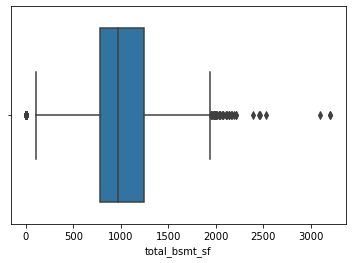

In [35]:
sns.boxplot(new_data['total_bsmt_sf'])

**Using IQR method to remove outliers**

In [36]:

Q1 = np.percentile(new_data['total_bsmt_sf'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(new_data['total_bsmt_sf'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", new_data.shape)
 
# Upper bound
upper = np.where(new_data['total_bsmt_sf'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(new_data['total_bsmt_sf'] <= (Q1-1.5*IQR))

print(upper[0])
print(lower[0])
 
''' Removing the Outliers '''
#new_data.drop(upper[0], inplace = True)
#new_data.drop(lower[0], inplace = True)
 
print("New Shape: ", new_data.shape)

Old Shape:  (2727, 21)
[   3  122  246  293  301  322  328  356  395  397  400  411  467  517
  744  894  897  905  956 1504 1574 1575 1577 1581 1639 1645 1723 1957
 2001 2078 2163 2171 2208 2212 2269 2273 2369 2398 2521 2522]
[  73  138  189  226  254  256  271  505  594  620  622  651  722  728
  729  736  748  749  751  752  753  754  756  825  836  838  884  891
  907 1103 1118 1148 1151 1156 1165 1221 1237 1239 1270 1392 1394 1395
 1397 1400 1446 1460 1686 1741 1748 1760 1763 1829 1863 1864 1928 1939
 1946 2031 2037 2064 2090 2122 2172 2299 2421 2426 2427 2429 2430 2431
 2484 2505 2507 2511 2543 2548 2680 2692 2701]
New Shape:  (2727, 21)


<AxesSubplot:xlabel='total_bsmt_sf'>

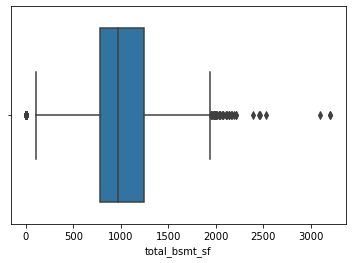

In [37]:
sns.boxplot(new_data['total_bsmt_sf'])

#### **Similarly IR method is used to remove outlers for all the Numerical Attributes**

<AxesSubplot:xlabel='first_flr_sf'>

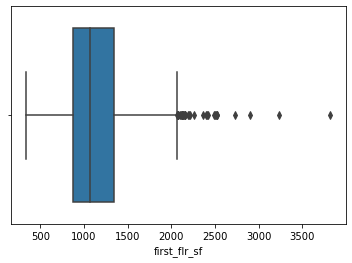

In [38]:
sns.boxplot(new_data['first_flr_sf'])

In [39]:
Q1 = np.percentile(new_data['first_flr_sf'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(new_data['first_flr_sf'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", new_data.shape)
 
# Upper bound
upper = np.where(new_data['first_flr_sf'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(new_data['first_flr_sf'] <= (Q1-1.5*IQR))

print(upper[0])
print(lower[0])
 
''' Removing the Outliers '''
#new_data.drop(upper[0], inplace = True)
#new_data.drop(lower[0], inplace = True)
 
print("New Shape: ", new_data.shape)

Old Shape:  (2727, 21)
[   3   18  122  328  356  395  467  721  744  876  926 1162 1392 1464
 1504 1574 1575 1639 1645 1702 1723 1935 1936 1957 2073 2078 2079 2163
 2212 2269 2310 2335 2369]
[]
New Shape:  (2727, 21)


<AxesSubplot:xlabel='gr_liv_area'>

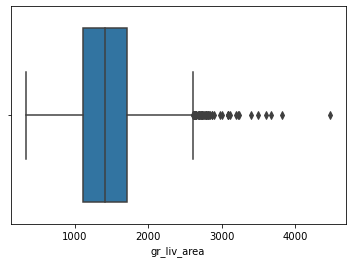

In [40]:
sns.boxplot(new_data['gr_liv_area'])

In [41]:
Q1 = np.percentile(new_data['gr_liv_area'], 25,
                   interpolation = 'midpoint')
 
    
Q3 = np.percentile(new_data['gr_liv_area'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", new_data.shape)
 
# Upper bound
upper = np.where(new_data['gr_liv_area'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(new_data['gr_liv_area'] <= (Q1-1.5*IQR))

print(upper[0])
print(lower[0])

A= [14,62,245,332,363,407,408,412,417,474,475,480,542,562,645,689,776,777,778,865,972,977,1002,1006,1007,1011,1014,1015,1046,1103,1104,1128,1145,1228,1246,1260,1355,1465,1611,1618,1624,1678,1742,1743,1850,1945,1965,1989,1993,1994,2082,2101,2105,2117,2207,2214,2215,2217,2219,2220,2221,2234,2282,2326,2327,2330,2331,2334,2341,2377,2379,2406,2448,2537,2604]
 
''' Removing the Outliers '''
#for i in range[0,len(A)]:
#new_data.drop(upper[0], inplace = True)

#new_data.drop(lower[0], inplace = True)
 
print("New Shape: ", new_data.shape)

Old Shape:  (2727, 21)
[  53  144  236  271  322  353  398  455  456  519  534  613  659  757
  758  759  849  961  982  984  989 1062 1091 1098 1184 1202 1216 1315
 1392 1464 1582 1639 1645 1667 1701 1702 1724 1806 1904 1923 1950 1954
 1955 2047 2065 2066 2069 2079 2163 2171 2184 2265 2273 2310 2336 2378
 2398 2471 2541]
[]
New Shape:  (2727, 21)


<AxesSubplot:xlabel='garage_area'>

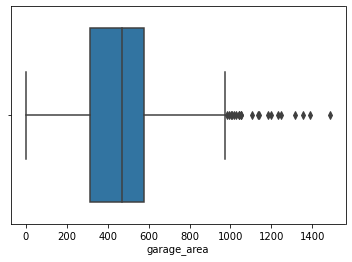

In [42]:
sns.boxplot(new_data['garage_area'])

In [43]:
Q1 = np.percentile(new_data['garage_area'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(new_data['garage_area'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", new_data.shape)
 
# Upper bound
upper = np.where(new_data['garage_area'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(new_data['garage_area'] <= (Q1-1.5*IQR))

print(upper[0])
print(lower[0])
 
''' Removing the Outliers '''
#new_data.drop(upper[0], inplace = True)
#new_data.drop(lower[0], inplace = True)
 
print("New Shape: ", new_data.shape)

Old Shape:  (2727, 21)
[ 229  397  461  474  479  688  760  804  961  985 1155 1450 1666 1716
 1806 1955 2117 2122 2126 2269 2275 2398]
[]
New Shape:  (2727, 21)


### Separating dependent and independent variables

In [44]:
X = new_data.drop('sale_price', axis=1)
Y= new_data['sale_price']

### Using get_dummies method to convert categorical data into numeric data

In [45]:
X = pd.get_dummies(X, columns=['ms_subclass','neighborhood','overall_qual','exter_qual','foundation','bsmt_qual','kitchen_qual','fireplace_qu','garage_type','garage_finish'])

In [46]:
X.shape, Y.shape

((2727, 102), (2727,))

### Splitting data into train and test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

#X_train = pd.get_dummies(X_train, columns=['ms_subclass','neighborhood','overall_qual','exter_qual','foundation','bsmt_qual','kitchen_qual','fireplace_qu','garage_type','garage_finish'])
#X_test = pd.get_dummies(X_test,  columns=['ms_subclass','neighborhood','overall_qual','exter_qual','foundation','bsmt_qual','kitchen_qual','fireplace_qu','garage_type','garage_finish'])

### Defining MAPE

In [79]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## LINEAR REGRESSION

In [86]:
regr = LinearRegression()
 
model = regr.fit(X_train, y_train)
pred = model.predict(X_test)
print("R-Square for Simple Linear Regression : ", r2_score(y_test, pred))

R-Square for Simple Linear Regression :  0.8904906171118261


In [87]:
print("MAPE for Simple Linear Regression : ", mean_absolute_percentage_error(y_test, pred))

MAPE for Simple Linear Regression :  10.05013662513344


## DECISION TREE REGRESSOR

In [81]:
regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_model = regressor.fit(X_train, y_train)

In [82]:
y_pred = regressor.predict(X_test)

In [85]:
print("R-Square for Decision Tree Regression : ", r2_score(y_test, y_pred))

R-Square for Decision Tree Regression :  0.7057970728463472


In [84]:
print("MAPE for Decision Tree Regression : ", mean_absolute_percentage_error(y_test, y_pred))

MAPE for Decision Tree Regression :  15.140741344737227


## GRADIENT BOOSTING

In [54]:
GBR = GradientBoostingRegressor()

In [55]:
#tuning the parameters
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [56]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [57]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=1500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.8868518181033316

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.1}


In [70]:
#instatiating the model based on above best parameters
GBR = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=1500, subsample=0.1)

In [71]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=1500,
                          subsample=0.1)

In [72]:
pred3 = GBR.predict(X_test)

In [77]:
print("R-Square for Gradient Boosting Regression: ", r2_score(y_test, pred3))

R-Square for Gradient Boosting Regression:  0.8917642646830459


In [76]:
print("MAPE for Gradient Boosting Regression : ", mean_absolute_percentage_error(y_test, pred3))

MAPE for Gradient Boosting Regression :  9.834503776149074


In [125]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

### LASSO REGRESSION

In [126]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)
pred4 = lasso_model.predict(X_test)
print("R-Square for Lasso Regression : ", r2_score(y_test, pred4))

R-Square for Lasso Regression :  0.8904928728151902


In [98]:
print("MAPE for Lasso Regression : ", mean_absolute_percentage_error(y_test, pred4))

MAPE for Lasso Regression :  10.050032038577067


### ELASTICNET

In [99]:
elastic_net_model = ElasticNet(alpha = 0.01)
elastic_net_model.fit(X_train, y_train)
pred5 = elastic_net_model.predict(X_test)
print("R-Square for Elastic Net : ", r2_score(y_test, pred5))

R-Square for Elastic Net :  0.8889492313923522


In [100]:
print("MAPE for Elastic Net : ", mean_absolute_percentage_error(y_test, pred5))

MAPE for Elastic Net :  10.316490459197226


In [129]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)
pred6 = ridge_model.predict(X_test)
print(r2_score(y_test, pred6))

0.8905078646463892


In [128]:
mean_absolute_percentage_error(y_test, pred6)

10.050169398967196

### RANDOM FOREST REGRESSION

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
random_forest = RandomForestRegressor()

In [114]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
pred8 = random_forest.predict(X_test)

In [123]:
print("R-Square for Random Forest Regression : ", r2_score(y_test, pred8))

R-Square for Random Forest Regression :  0.8757173862236949


In [124]:
print("MAPE for Random Forest Regression : ", mean_absolute_percentage_error(y_test, pred8))

MAPE for Random Forest Regression :  10.111301596864616
